In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('Weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]))            
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul(inputs, Weights) + biases
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

In [51]:
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

In [52]:
with tf.name_scope('inputs'):
    # define placeholder for inputs to network
    xs = tf.placeholder(tf.float32, [None, 1])
    ys = tf.placeholder(tf.float32, [None, 1])

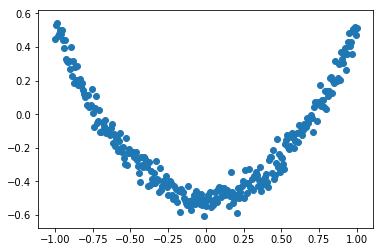

In [60]:
# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()#本次运行请注释，全局运行不要注释
plt.show()




l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)


prediction = add_layer(l1, 10, 1, activation_function=None)
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

#init = tf.initialize_all_variables() # tf 马上就要废弃这种写法
init = tf.global_variables_initializer()  # 替换成这样就好

sess = tf.Session()
writer = tf.summary.FileWriter("C:/Users/Triby/Desktop/logs", sess.graph)
sess.run(init)
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
        
        